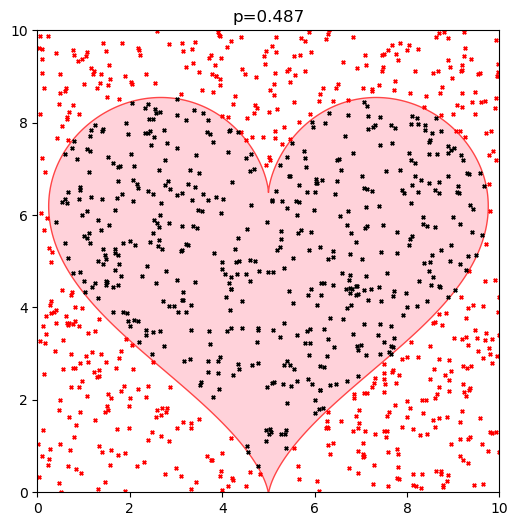

Число точек: 1000
Попаданий в сердце: 487
Вероятность попадания 0.487


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import Polygon

def heart_param(t):
    x = 16 * np.sin(t)**3
    y = 13 * np.cos(t) - 5 * np.cos(2*t) - 2 * np.cos(3*t) - np.cos(4*t)
    return x, y

def polygon_area(x, y):
    return 0.5 * abs(np.dot(x, np.roll(y, -1)) - np.dot(y, np.roll(x, -1)))

def make_heart_polygon(target_fraction=0.5, side=1.0, n_points=5000):
    t = np.linspace(0, 2*np.pi, n_points, endpoint=False)
    hx, hy = heart_param(t)

    hx = hx - np.mean(hx)
    hy = hy - np.mean(hy)
    
    hx_range = hx.max() - hx.min()
    hy_range = hy.max() - hy.min()
    hx = hx / max(hx_range, hy_range)
    hy = hy / max(hx_range, hy_range)

    area0 = polygon_area(hx, hy)

    target_area = target_fraction * (side * side)

    s = np.sqrt(target_area / area0)

    hx_s = hx * s
    hy_s = hy * s

    cx, cy = side / 2.0, side / 2.0
    hx_plot = hx_s + cx
    hy_plot = hy_s + cy

    final_area = polygon_area(hx_plot, hy_plot)

    return hx_plot, hy_plot, final_area

def main(size):
    side=10
    hx, hy, area = make_heart_polygon(target_fraction=0.5, side=side, n_points=2000)

    fig, ax = plt.subplots(figsize=(6,6))
    ax.set_xlim(0, side)
    ax.set_ylim(0, side)
    ax.set_aspect('equal')

    heart_poly = Polygon(np.column_stack((hx, hy)), closed=True, facecolor='pink', edgecolor='red', alpha=0.7)
    ax.add_patch(heart_poly)

    # Случайные точки
    X = np.random.uniform(0, side, size)
    Y = np.random.uniform(0, side, size)
    points = np.column_stack((X, Y))

    path = Path(np.column_stack((hx, hy)))
    inside_mask = path.contains_points(points)
    inside = inside_mask.sum()
    prob = inside / size

    ax.scatter(X[~inside_mask], Y[~inside_mask], marker='x', color='red', s=6)
    ax.scatter(X[inside_mask], Y[inside_mask], marker='x', color='black', s=6)

    ax.set_title(f'p={prob:.3f}')
    plt.show()

    print(f'Число точек: {size}')
    print(f'Попаданий в сердце: {inside}')
    print(f'Вероятность попадания {prob:.3f}')

if __name__ == "__main__":
    main(size=1000)
